In [8]:
from sklearn.decomposition import PCA


import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# PCA

In [2]:
W2 = m = 60
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2] 

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)


In [3]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [4]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1


c:\Users\zsena\anaconda3\envs\homl3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
pca=PCA(n_components=d)
x_reduced=pca.fit_transform(X_train)

[]

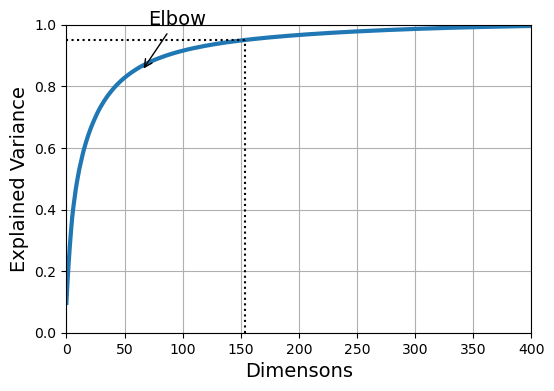

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.xlabel('Dimensons')
plt.ylabel("Explained Variance")
plt.axis([0, 400, 0, 1])
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], "k:")
plt.annotate("Elbow", xy=(65,0.85), xytext=(70,1), arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.plot()